In [1]:
import numpy as np
from math import factorial
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def comb(n, k):
    return factorial(n) // (factorial(k) * factorial(n - k))

In [3]:
points = np.random.randn(5,2)

In [4]:
points

array([[-0.91128871, -0.12779618],
       [-1.6124686 , -1.51279237],
       [ 0.76632731,  0.07163704],
       [ 1.82434548, -0.49537163],
       [ 2.176323  ,  0.80997199]])

In [5]:
# my implementation for general bezier curve

n_pts = 1000
n = points.shape[0]-1

def T (t,n):
    ans = np.array([t**i for i in range(n+1)])
    return ans.reshape((1,n+1))

def M (n):
    mat = np.zeros((n+1,n+1))
    for i in range(n+1):
        for k in range(i+1):
            mat[i][k] = comb(n,i)*comb(i,k)*pow(-1,(i-k))
    return mat

def bezier (T,M,pts):
    ans =( (T@M)@pts).flatten()
    return ans

t_values = np.linspace(0,1,n_pts)
xs = []
ys = []
M_m = M(n)
for t in t_values:
    T_m = T(t,n)
    x,y = bezier(T_m,M_m,points)
    xs.append(x)
    ys.append(y)

In [6]:
# omar aflak implementation

def get_bezier_curve(points):
    n = len(points) - 1
    return lambda t: sum(
        comb(n, i) * t**i * (1 - t)**(n - i) * points[i]
        for i in range(n + 1)
    )

def evaluate_bezier(points, total):
    bezier = get_bezier_curve(points)
    new_points = np.array([bezier(t) for t in np.linspace(0, 1, total)])
    return new_points[:,0], new_points[:,1]

#bx, by = evaluate_bezier(points, 100000)

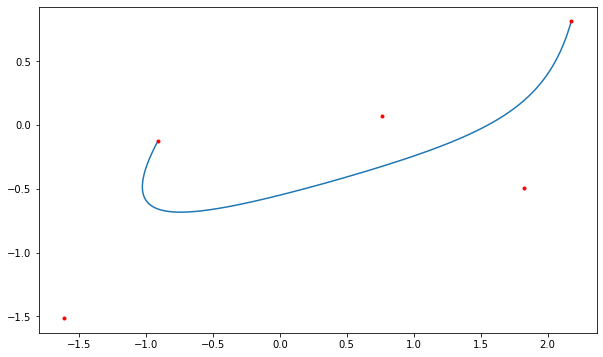

In [7]:
x, y = points[:,0], points[:,1]
plt.figure(figsize=(10,6))
plt.plot(xs,ys)
plt.plot(x,y,'r.')
plt.show()

In [8]:
# interpolation 
def get_bezier_coef(points):
    # since the formulas work given that we have n+1 points
    # then n must be this:
    n = len(points) - 1

    # build coefficents matrix
    C = 4 * np.identity(n)
    np.fill_diagonal(C[1:], 1)
    np.fill_diagonal(C[:, 1:], 1)
    C[0, 0] = 2
    C[n - 1, n - 1] = 7
    C[n - 1, n - 2] = 2

    # build points vector
    P = [2 * (2 * points[i] + points[i + 1]) for i in range(n)]
    P[0] = points[0] + 2 * points[1]
    P[n - 1] = 8 * points[n - 1] + points[n]

    # solve system, find a & b
    A = np.linalg.solve(C, P)
    B = [0] * n
    for i in range(n - 1):
        B[i] = 2 * points[i + 1] - A[i + 1]
    B[n - 1] = (A[n - 1] + points[n]) / 2

    return A, B


In [9]:
def get_cubic(a, b, c, d):
    return lambda t: np.power(1 - t, 3) * a + 3 * np.power(1 - t, 2) * t * b + 3 * (1 - t) * np.power(t, 2) * c + np.power(t, 3) * d

# return one cubic curve for each consecutive points
def get_bezier_cubic(points):
    A, B = get_bezier_coef(points)
    return [
        get_cubic(points[i], A[i], B[i], points[i + 1])
        for i in range(len(points) - 1)
    ]

# evalute each cubic curve on the range [0, 1] sliced in n points
def evaluate_bezier(points, n):
    curves = get_bezier_cubic(points)
    return np.array([fun(t) for fun in curves for t in np.linspace(0, 1, n)])


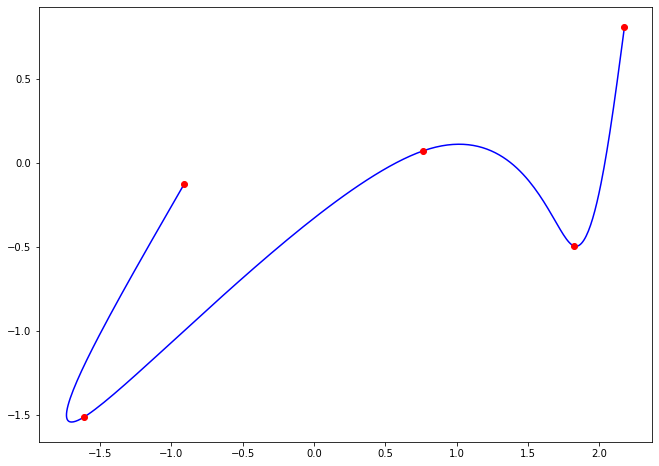

In [10]:
path = evaluate_bezier(points, 50)

# extract x & y coordinates of points
x, y = points[:,0], points[:,1]
px, py = path[:,0], path[:,1]

# plot
plt.figure(figsize=(11, 8))
plt.plot(px, py, 'b-')
plt.plot(x, y, 'ro')
plt.show()